In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from path_explain import utils
utils.set_up_environment(visible_devices='0')

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from train import load_mnist

In [56]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

reshaped_x_train = np.reshape(x_train, (x_train.shape[0], -1))
pca_model = PCA()
pca_model.fit(reshaped_x_train)

transformed_x_train = pca_model.transform(reshaped_x_train)

In [5]:
pca_components = pca_model.components_

In [6]:
first_component = pca_components[0]
first_component = first_component.reshape((28, 28))

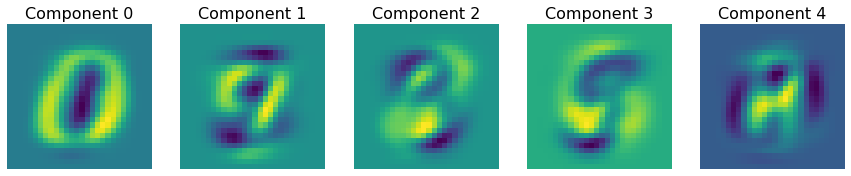

In [7]:
num_components_to_show = 5
fig, axs = plt.subplots(1, num_components_to_show, figsize=(3 * num_components_to_show, 3))
for i in range(num_components_to_show):
    axs[i].imshow(pca_components[i].reshape((28, 28)))
    axs[i].axis('off')
    axs[i].set_title('Component {}'.format(i), fontsize=16)

In [23]:
attributions = np.load('attributions.npy')
attributions_pca = np.load('attributions_pca.npy')

In [38]:
attributions_pca_recovered = np.dot(attributions_pca, pca_components)
attributions_pca_recovered = np.reshape(attributions_pca_recovered, (100, 28, 28))

In [47]:
interactions_pca = np.load('interactions_pca.npy')

In [54]:
import seaborn as sns; sns.set()

In [ ]:
select_interaction = interactions_pca[0]
np.fill_diagonal(select_interaction, 0)
sns.heatmap(select_interaction[:5, :5])

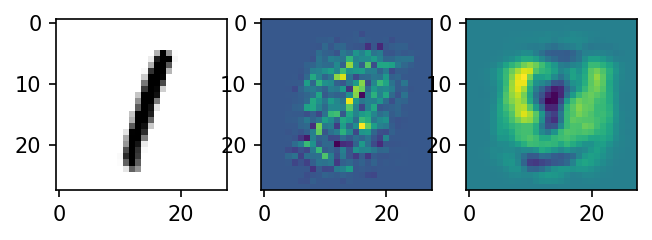

In [44]:
index = 5
fig, axs = plt.subplots(1, 3, figsize=(5, 15))
axs[0].imshow(x_test[index, :, :, 0], cmap='gray_r')
axs[1].imshow(attributions[index, :, :, 0], cmap='viridis')
axs[2].imshow(attributions_pca_recovered[index, :, :], cmap='viridis')